### Custom BERT implementation

In [1]:
%cd ../..
from inpainting.models import BERT
from inpainting.trainer import Trainer
from inpainting.datasets import MNIST
from inpainting.utils import configure_environment

configure_environment()

/home/ventus/.cache/pypoetry/virtualenvs/image-inpainting-rudDGIrt-py3.12/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/ventus/image-inpainting


/home/ventus/.cache/pypoetry/virtualenvs/image-inpainting-rudDGIrt-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Seed set to 83235


Device set to cuda


In [2]:
mnist = MNIST(frac=0.01, clusters=35, embeddings=True)
weights = 1/mnist.distribution

In [3]:
model = BERT(
    vocab_size = mnist.tokens,      # BERT's vocabulary size
    embed_size = mnist.tokens,      # Hidden size
    num_layers = 12,                # Number of Transformer layers
    num_heads = 12,                 # Numbertargets of attention heads
    ff_hidden = 6400,               # Feed-forward hidden size
    max_len = 7*7,                  # Maximum sequence length
    dropout = 0.00,
	embeddings="linear",
	ce_weights=weights
)

In [4]:
mnist[0]["input_ids"][1]

tensor([  0.0000, 831.6558, 390.0385, 587.6820, 613.6147, 624.8303, 689.2490,
        218.3457, 656.3612, 706.5534, 384.6215, 398.5359, 397.1989, 603.2748,
        693.0468, 414.6909, 723.1212, 587.1255, 609.9442, 214.6680, 461.5795,
        554.3835, 785.5998, 733.8848, 673.5789, 474.9059, 432.7393, 743.2792,
        764.8953, 762.2814, 668.1291, 900.8383, 604.4418, 243.0842, 222.9831,
          2.0329])

In [5]:
Trainer(model, mnist).train(epochs=50, batch_size=64, lr=2e-5)

running on device cuda
Epoch: 0.00	RMSE: 69.82	Loss: 3.33e+00	Learning Rate: 1.96e-05
Epoch: 1.00	RMSE: 61.29	Loss: 2.52e+00	Learning Rate: 1.91e-05
Epoch: 2.00	RMSE: 30.34	Loss: 1.96e+00	Learning Rate: 1.87e-05
Epoch: 3.00	RMSE: 24.60	Loss: 1.53e+00	Learning Rate: 1.83e-05
Epoch: 4.00	RMSE: 24.42	Loss: 1.19e+00	Learning Rate: 1.79e-05
Epoch: 5.00	RMSE: 24.57	Loss: 9.59e-01	Learning Rate: 1.74e-05
Epoch: 6.00	RMSE: 23.02	Loss: 8.11e-01	Learning Rate: 1.70e-05
Epoch: 7.00	RMSE: 22.67	Loss: 6.98e-01	Learning Rate: 1.66e-05
Epoch: 8.00	RMSE: 21.66	Loss: 5.86e-01	Learning Rate: 1.62e-05
Epoch: 9.00	RMSE: 22.38	Loss: 5.61e-01	Learning Rate: 1.57e-05
Epoch: 10.00	RMSE: 23.07	Loss: 5.25e-01	Learning Rate: 1.53e-05
Epoch: 11.00	RMSE: 22.82	Loss: 5.05e-01	Learning Rate: 1.49e-05
Epoch: 12.00	RMSE: 21.33	Loss: 4.97e-01	Learning Rate: 1.44e-05
Epoch: 13.00	RMSE: 22.86	Loss: 4.93e-01	Learning Rate: 1.40e-05
Epoch: 14.00	RMSE: 23.26	Loss: 4.58e-01	Learning Rate: 1.36e-05
Epoch: 15.00	RMSE: 22.79	Lo

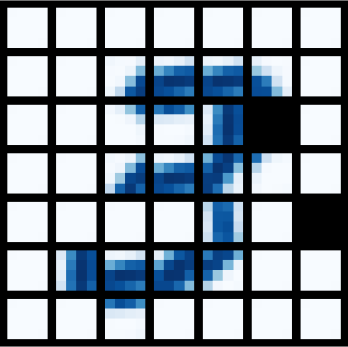

In [22]:
import torch
x, y = mnist[7].values()
zero_row_indices = torch.where(torch.all(x == 0, axis=1))[0]
y[zero_row_indices] = mnist.mask_id
mnist.plot_sample(y)

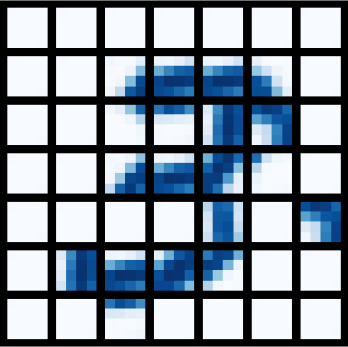

In [23]:
y = model(x.unsqueeze(0).cuda()).logits.argmax(dim=-1).cpu()
mnist.plot_sample(y)